### Part I: Research Question

#### A.  Describe the purpose of this data mining report by doing the following:

**1. Propose one question relevant to a real-world organizational situation that you will answer using one of the following prediction methods:**

* **decision trees**
* **random forests**
* **advanced regression (i.e., lasso or ridge regression)**

We will be analyzing the medical data set for this analysis. Our research question for this performance assessment is:
**Is it possible to predict the TotalCharge variable in our dataset with random forests?** 

We will be using random forests for this analysis.

**2. Define one goal of the data analysis. Ensure that your goal is reasonable within the scope of the scenario and is represented in the available data.**

The goal for this analysis is to perform a random forests machine learning model to help the hospital predict a patient's total charge.

### Part II: Method Justification

#### B. Explain the reasons for your chosen prediction method from part A1 by doing the following:

**1. Explain how the prediction method you chose analyzes the selected data set. Include expected outcomes.**

Random forests are an ensemble learning method used for both classification and regression. For regression, random forests constructs multiple decision trees during training and then outputs the mean of the predictions. Each tree makes an individual prediction. These individual predictions are then averaged and produced as a single result.

Since the random forests method uses multiple decision trees and averages the result, it is better than a single decision tree. The multiple trees improves it's accuracy and reduces overfitting.

In this analysis, we will be observing the medical dataset. We are expecting our outcome to have an accuracy of at least over 50% (indicated by the r-squared value).


**2. Summarize one assumption of the chosen prediction method.**

The random forest uses bootstrap aggregation, and it assumes that sampling is representative, which is also an assumption of the decision tree on which the random forest is built. The tree-based model depends heavily on the training dataset used to build the model. (StackExchange, n.d).


**3. List the packages or libraries you have chosen for Python or R, and justify how each item on the list supports the analysis.**

We will be using the following libraries for this analysis:

* Pandas - We will using pandas we will upload the data into our workspace
* Seaborn - We will be using Seaborn for the data visualizations (scatterplot and heatmap)
* MatPlotLib - We will be using MatPlotLib to show our data visualization graphs
* SKLearn - We will be using SKLearn for the random forest classification, to split the data into a training and test set, to select variables with p-values < 0.05

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score, mean_absolute_error

from sklearn.feature_selection import SelectKBest


%matplotlib inline

In [2]:
# load the data into the workspace
df = pd.read_csv(r"C:\Users\shabn\Documents\WGU - MSDA\D207\Medical Data - 207\medical_clean.csv")

### Part III: Data Preparation

#### C. Perform data preparation for the chosen data set by doing the following:

**1. Describe one data preprocessing goal relevant to the prediction method from part A1.**

These are our data preprocessing goals to run our decision tree algorithm:
* Evaluate the column names and rename the columns that are unclear, long, or misspellings
* Run isnull() to determine if there are any missing values in the dataset
* Use data visualizations to determine if there are outliers
* Convert the categorical variables into dummy variables, machine learning algorithms cannot work under categorical variables
<br>

**2. Identify the initial data set variables that you will use to perform the analysis for the prediction question from part A1, and group each variable as continuous or categorical.**

We will be using the medical dataset for this analysis.

The following variables will be dropped from our data set since they are not relevant measures for our research question: *Customer_id, CaseOrder, Interaction, UID, City, State, County, Zip, Lat, Lng, Area, TimeZone, Job, Marital, and Population*.

We then will use SelectKBest to drop the variables that have a p-value above 0.05, since those with a p-value above 0.05 are considered statisitically insignificant. Finally, we will also drop Initial_days as it is highly correlated with TotalCharge. As such, we have reduced the dataset to the following:

* TotalCharge (target variable) - Continuous
* DummyStroke - Categorical
* DummyReAdmis - Categorical
* DummyAsthma - Categorical
* DummyAnxiety - Categorical

**3. Explain the steps used to prepare the data for the analysis. Identify the code segment for each step.**

This analysis will follow the following step to prepare the data:

* Load the data into the data frame using pd.get_csv()
* View the data using the describe() and .columns  and evaluate the data structures and data types using .dtypes
* Rename the columns to give proper naming for the predictors
* Identify, remove, and remedy null values and missing data from our data set
* Convert categorical variables into dummy variables
* Look for any outliers in data using data visualizaion
* Select variables/features (using SelectKBest from scikit-learn) to improve model efficiency, we will select variables that have a p-value below 0.05

The code for these data preparation steps are provided in the annotated code below.
<br>


**4. Provide a copy of the cleaned data set.**

A copy of the cleaned and reduced data set is attached to this performance assessment.

In [3]:
# view data using describe()
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [4]:
# view data using columns
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [5]:
# Rename the last 8 columns to reflect what the variables measure

df.rename(columns = {
    'Item1':'TimelyAdmission',
    'Item2':'TimelyTreatment',
    'Item3':'TimelyVisits',
    'Item4':'Reliability',
    'Item5':'Options',
    'Item6':'TreatmentTime',
    'Item7':'Courteous',
    'Item8':'ActiveListening'
}, inplace=True)

df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'TimelyAdmission',
       'TimelyTreatment', 'TimelyVisits', 'Reliability', 'Options',
       'TreatmentTime', 'Courteous', 'ActiveListening'],
      dtype='object')

In [6]:
# Check for missing values
display(df.isnull().any())

CaseOrder             False
Customer_id           False
Interaction           False
UID                   False
City                  False
State                 False
County                False
Zip                   False
Lat                   False
Lng                   False
Population            False
Area                  False
TimeZone              False
Job                   False
Children              False
Age                   False
Income                False
Marital               False
Gender                False
ReAdmis               False
VitD_levels           False
Doc_visits            False
Full_meals_eaten      False
vitD_supp             False
Soft_drink            False
Initial_admin         False
HighBlood             False
Stroke                False
Complication_risk     False
Overweight            False
Arthritis             False
Diabetes              False
Hyperlipidemia        False
BackPain              False
Anxiety               False
Allergic_rhinitis   

In [7]:
# Now we will drop variables that are not relevant / measurable to the research question
df = df.drop(['Customer_id','CaseOrder','Interaction','UID','City','State','County','Zip','Lat','Lng', 
             "Area",'TimeZone','Job','Marital', 'Population'], axis=1)

In [8]:
# Let's get a list of the categorical variables and their unique values

for c in df.loc[:, df.columns]: # We are looking for columns in df
    if df.dtypes[c] == "object": # select columns that dtype = object
        print('\n{} is categorical: {}.'.format(c, df[c].unique()))
    if df.dtypes[c] == "int64":
        print('\n{} is numerical.'.format(c))
    if df.dtypes[c] == "float64":
        print('\n{} is numerical'.format(c))


Children is numerical.

Age is numerical.

Income is numerical

Gender is categorical: ['Male' 'Female' 'Nonbinary'].

ReAdmis is categorical: ['No' 'Yes'].

VitD_levels is numerical

Doc_visits is numerical.

Full_meals_eaten is numerical.

vitD_supp is numerical.

Soft_drink is categorical: ['No' 'Yes'].

Initial_admin is categorical: ['Emergency Admission' 'Elective Admission' 'Observation Admission'].

HighBlood is categorical: ['Yes' 'No'].

Stroke is categorical: ['No' 'Yes'].

Complication_risk is categorical: ['Medium' 'High' 'Low'].

Overweight is categorical: ['No' 'Yes'].

Arthritis is categorical: ['Yes' 'No'].

Diabetes is categorical: ['Yes' 'No'].

Hyperlipidemia is categorical: ['No' 'Yes'].

BackPain is categorical: ['Yes' 'No'].

Anxiety is categorical: ['Yes' 'No'].

Allergic_rhinitis is categorical: ['Yes' 'No'].

Reflux_esophagitis is categorical: ['No' 'Yes'].

Asthma is categorical: ['Yes' 'No'].

Services is categorical: ['Blood Work' 'Intravenous' 'CT Scan' 'M

In [9]:
# We will change the categorical variables to binary numerical values (1 or 0)

df['DummyGender'] = [1 if v == 'Male' else 0 for v in df['Gender']]
df['DummyReAdmis'] = [1 if v == 'Yes' else 0 for v in df['ReAdmis']]
df['DummySoft_drink'] = [1 if v == 'Yes' else 0 for v in df['Soft_drink']]
df['DummyHighBlood'] = [1 if v == 'Yes' else 0 for v in df['HighBlood']]
df['DummyStroke'] = [1 if v == 'Yes' else 0 for v in df['Stroke']]
df['DummyOverweight'] = [1 if v == 'Yes' else 0 for v in df['Overweight']]
df['DummyArthritis'] = [1 if v == 'Yes' else 0 for v in df['Arthritis']]
df['DummyDiabetes'] = [1 if v == 'Yes' else 0 for v in df['Diabetes']]
df['DummyHyperlipidemia'] = [1 if v == 'Yes' else 0 for v in df['Hyperlipidemia']]
df['DummyBackPain'] = [1 if v == 'Yes' else 0 for v in df['BackPain']]
df['DummyAnxiety'] = [1 if v == 'Yes' else 0 for v in df['Anxiety']]
df['DummyAllergic_rhinitis'] = [1 if v == 'Yes' else 0 for v in df['Allergic_rhinitis']]
df['DummyReflux_esophagitis'] = [1 if v == 'Yes' else 0 for v in df['Reflux_esophagitis']]
df['DummyAsthma'] = [1 if v == 'Yes' else 0 for v in df['Asthma']]

# For Emergency_Admin, we will assign 1 to all emergency admission and 0 for the rest
df['DummyEmergency_Admin'] = [1 if v == 'Emergency Admission' else 0 for v in df['Initial_admin']]

# For Complication_Risk, we will assign 1 to all high complications and 0 for medium and low
df['DummyHighComplication_risk'] = [1 if v == 'High' else 0 for v in df['Complication_risk']]

# For Services, we will assign 1 to all xray scans (CT scan and MRI) and 0 to other services (blood work and IV)
df['DummyXRAYServices'] = [1 if v == ('CT Scan' or 'MRI') else 0 for v in df['Services']]

df.columns

Index(['Children', 'Age', 'Income', 'Gender', 'ReAdmis', 'VitD_levels',
       'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink',
       'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'Services', 'Initial_days', 'TotalCharge', 'Additional_charges',
       'TimelyAdmission', 'TimelyTreatment', 'TimelyVisits', 'Reliability',
       'Options', 'TreatmentTime', 'Courteous', 'ActiveListening',
       'DummyGender', 'DummyReAdmis', 'DummySoft_drink', 'DummyHighBlood',
       'DummyStroke', 'DummyOverweight', 'DummyArthritis', 'DummyDiabetes',
       'DummyHyperlipidemia', 'DummyBackPain', 'DummyAnxiety',
       'DummyAllergic_rhinitis', 'DummyReflux_esophagitis', 'DummyAsthma',
       'DummyEmergency_Admin', 'DummyHighComplication_risk',
       'DummyXRAYServices'],
      dtype='object')

In [10]:
# drop the variables that have been assigned dummy variables
df = df[['Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp','Initial_days',
       'TotalCharge', 'Additional_charges', 'TimelyAdmission',
       'TimelyTreatment', 'TimelyVisits', 'Reliability', 'Options',
       'TreatmentTime', 'Courteous', 'ActiveListening', 'DummyReAdmis', 'DummyGender',
       'DummySoft_drink', 'DummyDiabetes', 'DummyStroke',
       'DummyArthritis', 'DummyHyperlipidemia', 'DummyBackPain', 'DummyAnxiety',
       'DummyAllergic_rhinitis', 'DummyReflux_esophagitis', 'DummyAsthma', 
        'DummyHighBlood', 'DummyXRAYServices', 'DummyEmergency_Admin', 'DummyHighComplication_risk', 'DummyOverweight']]

In [11]:
# use SelectKBest to select statistically significant variables with p < 0.05

# assign values to X for all predictor features
# assign values to y for the dependent variable

X = df.drop(["TotalCharge"],1)
y = df["TotalCharge"]

# print the shape of our X, y variables
print(X.shape)
print(y.shape)

# assign feature_names to the column names of X 
feature_names = X.columns

# initialize the class and call fit_transform
skbest = SelectKBest(k='all')
X_new = skbest.fit_transform(X, y)
X_new.shape

# find the P-values to select statistically significant features 
p_values = pd.DataFrame({'Feature': X.columns, 'p_value':skbest.pvalues_}).sort_values('p_value')
p_values[p_values['p_value'] < .05]

# assign features_to_keep with variables with p_values below 0.05
features_to_keep = p_values['Feature'][p_values['p_value'] < .05]

# print the name of the selected features
features_to_keep

(10000, 34)
(10000,)


C:\Users\shabn\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


21     DummyStroke
17    DummyReAdmis
28     DummyAsthma
25    DummyAnxiety
7     Initial_days
Name: Feature, dtype: object

In [12]:
# save our reduced dataset to df_reduced
df_reduced = df[['TotalCharge', 'Initial_days','DummyStroke', 'DummyReAdmis', 'DummyAsthma', 'DummyAnxiety']]

In [13]:
df_reduced

,TotalCharge,Initial_days,DummyStroke,DummyReAdmis,DummyAsthma,DummyAnxiety
0,3726.702860,10.585770,0,0,1,1
1,4193.190458,15.129562,0,0,0,0
2,2434.234222,4.772177,0,0,0,0
3,2127.830423,1.714879,1,0,1,0
4,2113.073274,1.254807,0,0,0,0
...,...,...,...,...,...,...
9995,6850.942000,51.561220,0,0,0,1
9996,7741.690000,68.668240,0,1,1,0
9997,8276.481000,70.154180,0,1,0,1
9998,7644.483000,63.356900,0,1,0,0


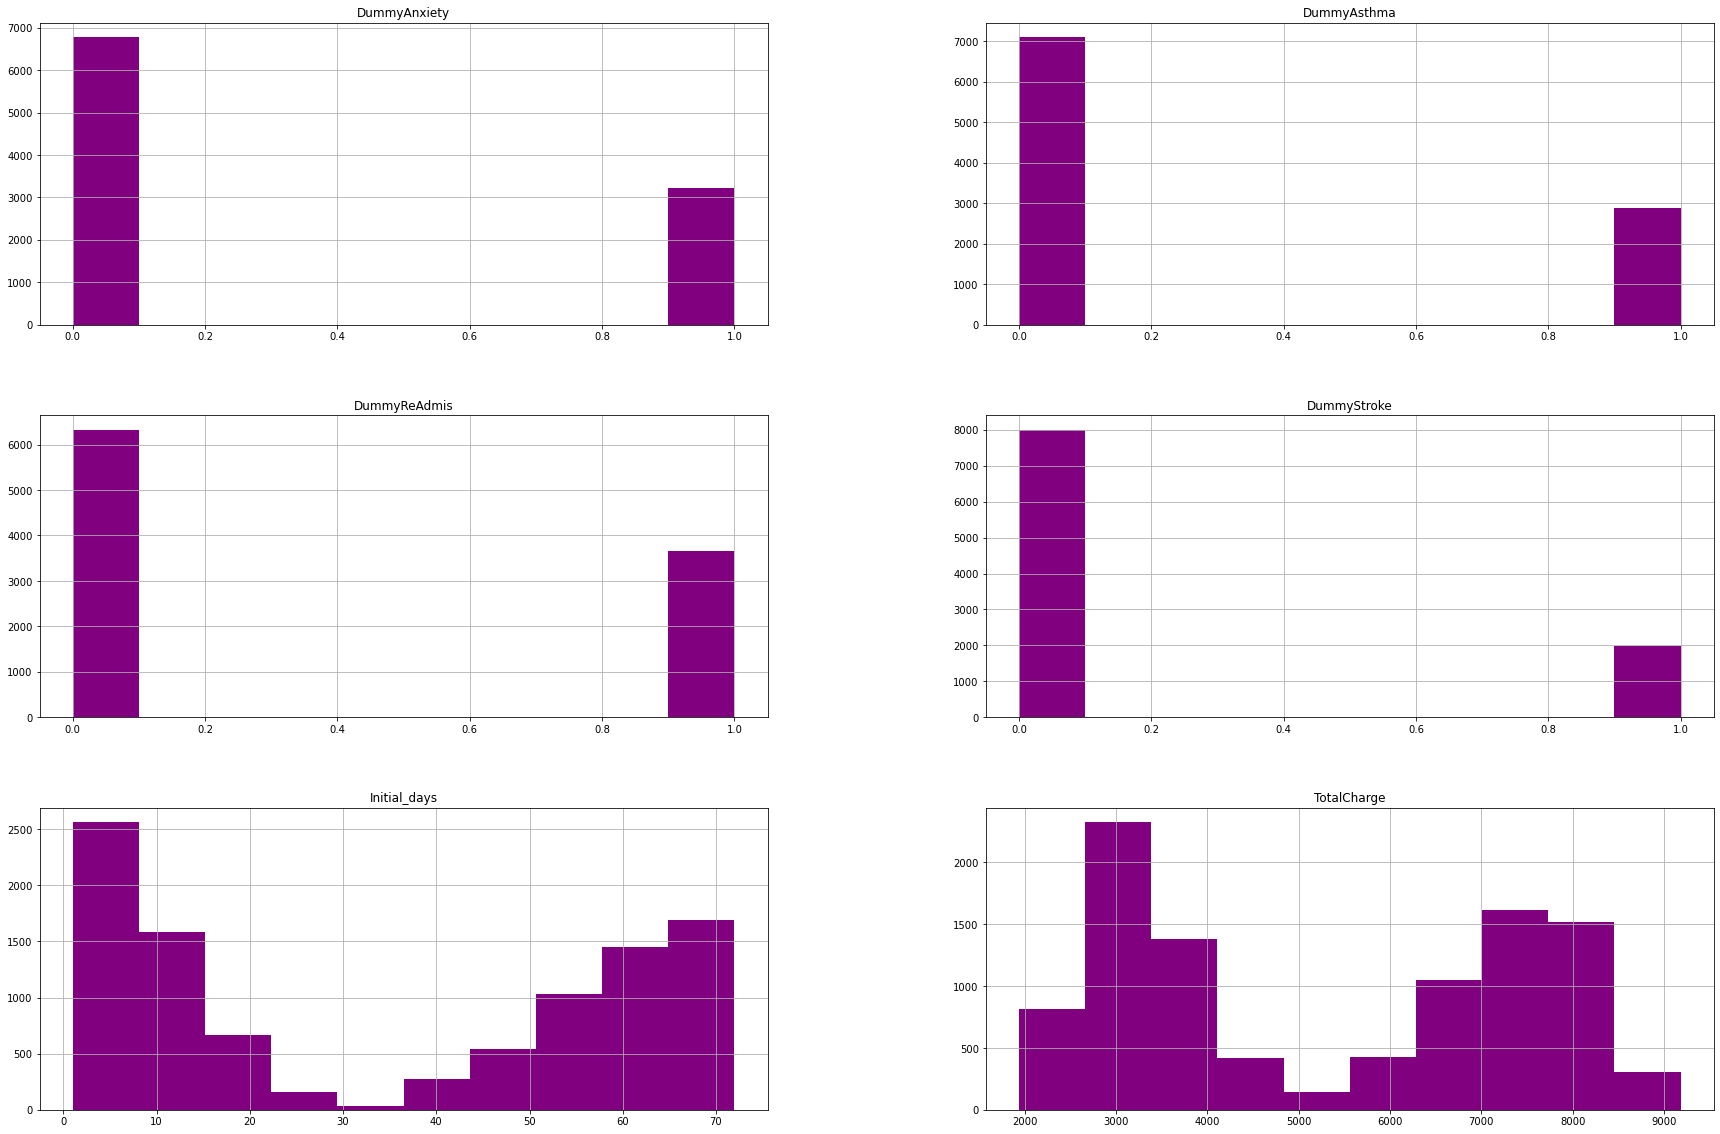

In [14]:
# Histograms of the variables to scan for outliers
df_reduced[['TotalCharge', 'Initial_days','DummyStroke', 'DummyReAdmis', 'DummyAsthma', 'DummyAnxiety']].hist(figsize=(30,20),color='purple')
plt.show()

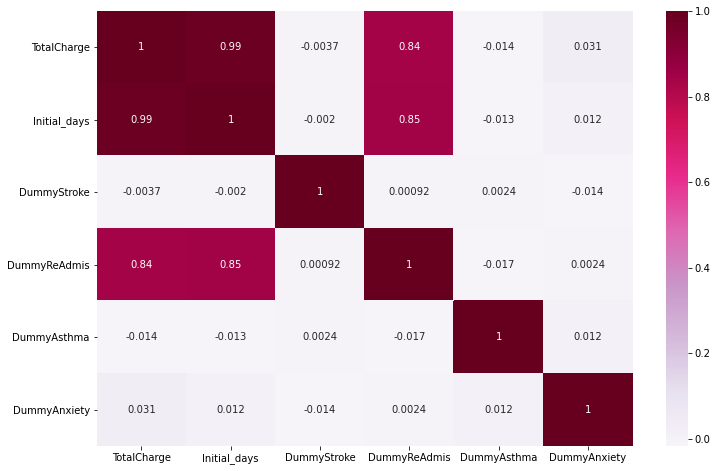

In [15]:
# the graph shows no outliers, let's get a sense of the correlation in the data

plt.figure(figsize=(12,8))
sns.heatmap(df_reduced.corr(), annot=True, cmap='PuRd')

In [16]:
df_reduced

,TotalCharge,Initial_days,DummyStroke,DummyReAdmis,DummyAsthma,DummyAnxiety
0,3726.702860,10.585770,0,0,1,1
1,4193.190458,15.129562,0,0,0,0
2,2434.234222,4.772177,0,0,0,0
3,2127.830423,1.714879,1,0,1,0
4,2113.073274,1.254807,0,0,0,0
...,...,...,...,...,...,...
9995,6850.942000,51.561220,0,0,0,1
9996,7741.690000,68.668240,0,1,1,0
9997,8276.481000,70.154180,0,1,0,1
9998,7644.483000,63.356900,0,1,0,0


In [17]:
df_reduced.to_csv('cleaned_reduced_data.csv')

### Part IV: Analysis

#### D.  Perform the data analysis and report on the results by doing the following:

**1. Split the data into training and test data sets and provide the file(s).**

Please see the below for this task.

In [18]:
SEED = 1

X = df_reduced.drop(['TotalCharge'],1)
y = df_reduced['TotalCharge']

# print the shape of our X, y variables
print(X.shape)
print(y.shape)

(10000, 5)
(10000,)


In [19]:
# split the data into a 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

In [20]:
# export the training and test data to csv files, scaled

pd.DataFrame(X_train).to_csv('X_train.csv')
pd.DataFrame(X_test).to_csv('X_test.csv')
pd.DataFrame(y_train).to_csv('y_train.csv')
pd.DataFrame(y_test).to_csv('y_test.csv')

**2. Describe the analysis technique you used to appropriately analyze the data. Include screenshots of the intermediate calculations you performed.**

* Converting the categorical variables into dummy variables (part of the data cleaning)
* Splitting the data into 70% training set and 30% testing set
* Building the random forest model
* Instantiating the RandomForestRegressor object
* Identify optional values for parameters using hyperparameter tuning
* Instantiating the GridSearchCV() object
* Performing GridSearchCV and training the model
* Checking and printing best parameters used
* Checking the best score for the top-performing model
* Printing MSE, RMSE, and R-Squared - scores
* Performing predictions on the test data and print test accuracy score
* Determining which features were the most predictive according to Random Forests Regressor

**3. Provide the code used to perform the prediction analysis from part D2.**

Please see the below for the code.


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# building the random forest model

# Instantiate a random forests regressor 'rf'
rf = RandomForestRegressor(random_state=SEED)

# get parameters for rf
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [22]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [23]:
# hyperparameter tuning
# create a dictionary with values for hyperparmeters

params_rf = {
    'n_estimators': [10, 50, 100], # say 10, 50, 100 for n_estimator
    'max_features': [2, 3, 4], # 2, 3, 4 for max_features
    'max_depth':[4, 6, 8, None], # 4 6, 8 or none for max_depth
    'min_samples_leaf': [0.1, 0.2] #0.1 or 0.2 for min_samples_leaf
}

In [24]:
# instantiate a 3 fold CV grid search object
# use the parameter dict defined above, use neg mean squared error for scoring method

grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:    6.9s finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, None],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [0.1, 0.2],
                         'n_estimators': [10, 50, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [25]:
# find the best hyperparameters using best_params_ 
best_hyperparams = grid_rf.best_params_

print('Best hyperparameteres for RF:\n', best_hyperparams)

Best hyperparameteres for RF:
 {'max_depth': 4, 'max_features': 4, 'min_samples_leaf': 0.1, 'n_estimators': 10}


In [26]:
# our model returned 'max_depth': 4, 'max_features': 4, 'min_samples_leaf': 0.1, 'n_estimators': 10 for the hyperparams
# save into best model

best_model = grid_rf.best_estimator_

# test data MSE & RMSE test
y_pred = best_model.predict(X_test)
mse_test = MSE(y_test, y_pred)
rmse_test = MSE(y_test, y_pred)**(1/2)


# print values for test
print('MSE of of the model: {:.3}'.format(mse_test))
print('RMSE of the model: {:.3}'.format(rmse_test))
print('R-squared score for the model (test data): {:.3}'.format(r2_score(y_test,y_pred)))


MSE of of the model: 1.62e+05
RMSE of the model: 4.02e+02
R-squared score for the model (test data): 0.966


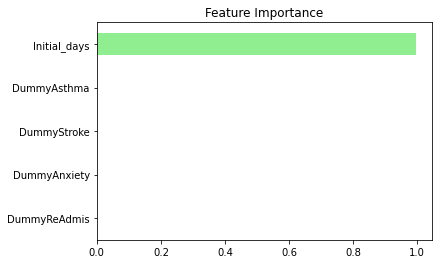

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# bar graph to show feature importance
importances_rf = pd.Series(rf.feature_importances_, index=X.columns)

sorted_importances_rf =  importances_rf.sort_values()

sorted_importances_rf.plot(kind='barh', color='lightgreen')

plt.title('Feature Importance')
plt.show()

### Part V: Data Summary and Implications

**E. Summarize your data analysis by doing the following:**

**1. Explain the accuracy and the mean squared error (MSE) of your prediction model.**

Mean Squared Error (MSE) represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals. Root Mean Squared Error (RMSE) is the square root of Mean Squared Error. It measures the standard deviation of residuals. A low MSE and RMSE implies a higher accuracy of the model.

R-squared represents the proportion of the variance in the dependent variable which is explained by the model. R Squared values are used for explaining how well the independent variables in the model explains the variability in the dependent variable. This implied that the higher the R squared value, the higher the variance is decribed by the variables (Rowe, 2018). This metric tells us how well the model fits the data.

Our model returned the following values:

* MSE of of the model: 1.62e+05
* RMSE of the model: 4.02e+02
* R-squared score for the model (test data): 0.966

Using the definitions above, we interpret the r-squared value as the accuracy of the model. In this instance, we have a 96.6% accuracy of our random forest model. The MSE and RMSE is measured in the same units as our outcome (TotalCharge). Noteably, we have a large MSE and RMSE returned for this model.

**2. Discuss the results and implications of your prediction analysis.**

Our model returned the following values:

* MSE of of the model: 1.62e+05
* RMSE of the model: 4.02e+02
* R-squared score for the model (test data): 0.966

As discussed above, we have a 96.6% accuracy of our random forest model. Our MSE and RMSE values are high, which can indicate strong bias in our data.

**3. Discuss one limitation of your data analysis.**

One limitation of random forest is that a large number of trees can make the algorithm too slow and ineffective for real-time predictions. In general, these algorithms are fast to train, but quite slow to create predictions once they are trained. A more accurate prediction requires more trees, which results in a slower model. In most real-world applications, the random forest algorithm is fast enough but there can certainly be situations where run-time performance is important and other approaches would be preferred (Donges, 2022).

**4. Recommend a course of action for the real-world organizational situation from part A1 based on your results and implications discussed in part E2.**

This analysis returned an accuracy score of 96.6%. Since our model returned a relatively high accuracy score, I would recommend the hospital to use the random forest regression model to predict TotalCharge. However, since there was a high MSE and RMSE, the hospital should note the high bias in the data when using the model for predicting TotalCharge.

Additionally, our random forests model only used 5 variables (Initial_days, DummyStroke, DummyReAdmis, DummyAsthma, DummyAnxiety) which makes the model accessible to implement. 

### Part VI: Demonstration

#### F.  Provide a Panopto video recording that includes a demonstration of the functionality of the code used for the analysis and a summary of the programming environment.

Please see the following link for the Panopto video: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=120ddf0c-e8b9-4378-b0a0-af80002a0cb2

#### G.  Record the web sources used to acquire data or segments of third-party code to support the analysis. Ensure the web sources are reliable.

Donges, Niklas. “Random Forest Classifier: A Complete Guide to How It Works in Machine Learning.” Built In, 28 Sept. 2022, https://builtin.com/data-science/random-forest-algorithm. 

Rowe, Walker. “Mean Square Error &amp; R2 Score Clearly Explained.” BMC Blogs, 5 July 2018, https://www.bmc.com/blogs/mean-squared-error-r2-and-variance-in-regression-analysis/. 

#### H.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.

This task is exemplified throughout the performance assessment.

#### I.  Demonstrate professional communication in the content and presentation of your submission.

This task is exemplified throughout the performance assessment.